# **UGain ML Tree-based Models Exercise Solutions Notebook**

Welcome dear reader to the tree-based model exercises. In this notebook, we will cover decision trees, pruning, ensemble methods, hyperparameters and variable importance.

To start with, we need to import several libraries that will be needed to run the code.

## **Import Libraries**

In [3]:
# Auto-Sklearn

# Basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

# Sklearn
## Data
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## Models
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
# Utility functions
from sklearn.metrics import make_scorer


## Model Explaination
from sklearn.inspection import permutation_importance

## Metrics
from sklearn.metrics import mean_squared_error

# XGBoost
import xgboost

# Plotting
import matplotlib.pyplot as plt
from IPython.display import display

Next up, we will load the dataset that will be used for the exercises. This dataset is the diabetes dataset, which is build into sklearn by default. It contains several variables of diabetic patients. The goal will be to see if some of these variables could be used to predict diabetes.

The complete description can be read using diabetes_data['DESCR']

## **Load Dataset**

In [4]:
# Load dataset
diabetes_data = load_diabetes()
predictors = diabetes_data['data']
labels = diabetes_data['target']

# Print description of the dataset
print(diabetes_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Now, we will split this dataset into a training set and a test set. Conveniently, sklearn has a simple function called train_test_split which can do this for us. As inputs, it takes the X values and the y values (which we call predictors and labels here) and a random state. This random state ensures that anyone who runs the code gets the exact same split. Changing the seed value will result in a different split.

In [5]:
# Parameters
seed = 0

# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(predictors, 
                                                    labels, 
                                                    random_state=seed)

We can specify the size of both datasets if we want to, or use stratification. For more info, you can look up the help page of sklearn.train_test_split

Now that we have our test set, we can start the exercises

## **Exercises**

### **Exercise 1a: Fit Decision Tree (Regression)**

First up, we will fit a decision tree to the data. Once again, we can use random state to ensure the same result is always obtained. Fitting a decision tree happens in two steps:
- Define the model with its parameters. For now, we will use the default values.
- Fit this model to the training data

Once this is done, the model can be evaluated by calculating the loss. The rmse can be calculated by:
- Calculating the predicted values using model.predict()
- Subtracting the real values from the predicted ones and squaring the result
- Summing up all these values to get the rmse

Then we can print the result (with some formatting to make it look nice)

In [7]:
# Create decision tree regressor object
decision_tree_regressor = tree.DecisionTreeRegressor(random_state=seed)

# Fit the training data to the regressor
decision_tree_regressor = ***.fit(***, ***)

# Calculate root mean square error of the train and test sets
train_rmse = np.sum(***)
test_rmse = np.sum(***)

# Verbose
print("Train set root mean squared error is: {} and test set root mean squared error is: {}".format(round(train_rmse, 4), 
                                                                                                    round(test_rmse, 4)))

Train set root mean squared error is: 0.0 and test set root mean squared error is: 77.4409


### **Exercise 1b: Search for the Best Cost-Complexity Pruning (alpha)**

Great. Now we can take a look at the cost complexity pruning path. Decision trees have a tendency to overfit to the data. As you might have noticed, the training error is much lower than the test error. To avoid overfitting, we can prune our trees. First, let's take a look at ccp 

In [ ]:
# Call built-in method to compute the pruning path during Minimal Cost-Complexity Pruning.
path = decision_tree_regressor.cost_complexity_pruning_path(***, ***)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Now we can use these to try and find good parameters for the model. However, to do this, we need a way to evaluate models with different parameters. This requires a formal loss function. Therefore, we make a little function to get a rmse loss function. We then use make_scorer to make this a formal loss function which can be used by sklearn. Remember to indicate that we wish to **minimize** the loss.

In [ ]:
def get_rmse(model, predictors, labels):
  predictions = model.predict(predictors)
  rmse = mean_squared_error(labels, predictions, squared=False)
  return rmse

def rmse_loss(true_labels, pred_labels):
  return mean_squared_error(true_labels, pred_labels, squared=False)

score_function_decision_tree = make_scorer(rmse_loss, greater_is_better=False)

Great. Now we can get started. First, we define a grid and then we use the gridsearchCV function to find optimal parameters. This method uses cross-validation. Cross-validation includes resampling and sample splitting methods that use different portions of the data to test and train a model on different iterations. This avoids overfitting.

We use a cv of 5, meaning the model is fit 5 times and we use 4/5th of the data for training and 1/5th for validation (cycling through until all combinations have been used)

In [8]:
# Define parameter space to search
param_grid = { 
    'ccp_alpha': ccp_alphas,}

# Create decision tree regressor object
decision_tree_regressor = tree.DecisionTreeRegressor(random_state=seed)

# Perform grid search in the defined parameter space with cross validation
CV_decision_tree_regressor = GridSearchCV(estimator=***, 
                                          param_grid=***, 
                                          cv= 5, 
                                          scoring=***)
CV_decision_tree_regressor.fit(***, ***)

Best Parameters: {'ccp_alpha': 208.74061453741638}
Train set root mean squared error is: 56.1185 and test set root mean squared error is: 66.6557


Now we can take a look at the best parameters

In [ ]:
# Verbose best parameters from the GridSearchCV
print('Best Parameters:', CV_decision_tree_regressor.best_params_)

Great. Now let us fit a final model using these parameters and see what happens to the rmse.

In [ ]:
# Fit decision tree regressor model with best parameters
decision_tree_regressor = tree.DecisionTreeRegressor(random_state=seed,
                                                    **CV_decision_tree_regressor.best_params_)
decision_tree_regressor = decision_tree_regressor.fit(X_train, y_train)

# Calculate root mean square error of the train and test sets
train_rmse = np.sum(***)
test_rmse = np.sum(***)

# Verbose
print("Train set root mean squared error is: {} and test set root mean squared error is: {}".format(round(train_rmse, 4), 
                                                                                                    round(test_rmse, 4)))

As you can see, the test set performs much better now (lower rmse). The training set is also much more in line with the test set, indicating less overfitting.

### **Exercise 2a: Fit an Ensemble Model (Regression)**

Now we will fit an ensemble model. We will select xgboost, which is an implementation of a random forest (an emsemble of decision trees).

If you want to use a different model or read more about this, here are some helpful links:
1. https://scikit-learn.org/stable/modules/ensemble.html
2. https://xgboost.readthedocs.io/en/stable/python/python_api.html

xgboost works the same way as a decision tree. First, define an object with the right parameters and then fit it to the training data.

In [11]:
# Create a XGBoost regressor object
xgboost_regressor = xgboost.XGBRegressor(objective ='reg:squarederror')

# Fit the training data to the XGBoost regressor
xgboost_regressor = xgboost_regressor.fit(***, ***)

Train set root mean squared error is: 29.122 and test set root mean squared error is: 62.0087


Then we once again calculate rmse and print it to the screen

In [ ]:
# Calculate root mean square error of the train and test sets
train_rmse = np.sum(***)
test_rmse = np.sum(***)


print("Train set root mean squared error is: {} and test set root mean squared error is: {}".format(round(train_rmse, 4), 
                                                                                                    round(test_rmse, 4)))

### **Exercise 2b: Search Hyperparameter Space of your Choice of Model**

Once again, the model isn't performing all too well. This is because we used default parameters. To boost performance, we will once again use cross-validation to evaluate a grid of parameters until we find the optimal set.

In [12]:
# Define parameter space to search
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.3, 0.5, 0.7],
    'min_child_weight': [1, 10, 100, 200, 500],
    'colsample_bytree': [0.1, 0.3, 0.7],
}

# Create XGBoost regressor object
xgboost_regressor = xgboost.XGBRegressor(objective ='reg:squarederror')

# Perform grid search in the defined parameter space with cross validation
CV_xgboost_regressor = GridSearchCV(estimator=***, 
                                    param_grid=***, 
                                    cv= 5, 
                                    scoring=***)
CV_xgboost_regressor.fit(***, ***)


Best Parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.5, 'max_depth': 3, 'min_child_weight': 100, 'n_estimators': 50}
Train set root mean squared error is: 48.5722 and test set root mean squared error is: 60.4998


Now let us take a look at the optimal parameters

In [ ]:
# Verbose best parameters from the GridSearchCV
print('Best Parameters:', CV_xgboost_regressor.best_params_)

And then fit a model with these optimal parameters

In [ ]:
# Fit XGBoost regressor model with best parameters
xgboost_regressor = xgboost.XGBRegressor(objective ='reg:squarederror',
                                         **CV_xgboost_regressor.best_params_)
xgboost_regressor = xgboost_regressor.fit(***, ***)


Finally, we calculate rmse again and compare to the original model. Has the performance improved? What about overfitting?

In [ ]:

# Calculate root mean square error of the train and test sets
train_rmse = get_rmse(xgboost_regressor, X_train, y_train)
test_rmse = get_rmse(xgboost_regressor, X_test, y_test)

# Verbose
print("Train set root mean squared error is: {} and test set root mean squared error is: {}".format(round(train_rmse, 4), 
                                                                                                    round(test_rmse, 4)))

### **Exercise 2c: Plot: Ensemble Regressor Feature Importance**

Lastly, let us take a look at the importance of specific features. Remember that the original goal of all this was to get information on which variables would be useful to predict diabetes. There is a built-in method to do this called permutation importance. In simple words, it will calculate how much worse a model performs when one variable is left out. Whichever variable has the biggest impact is likely the most relevant for predictions. For this, we use the test set.

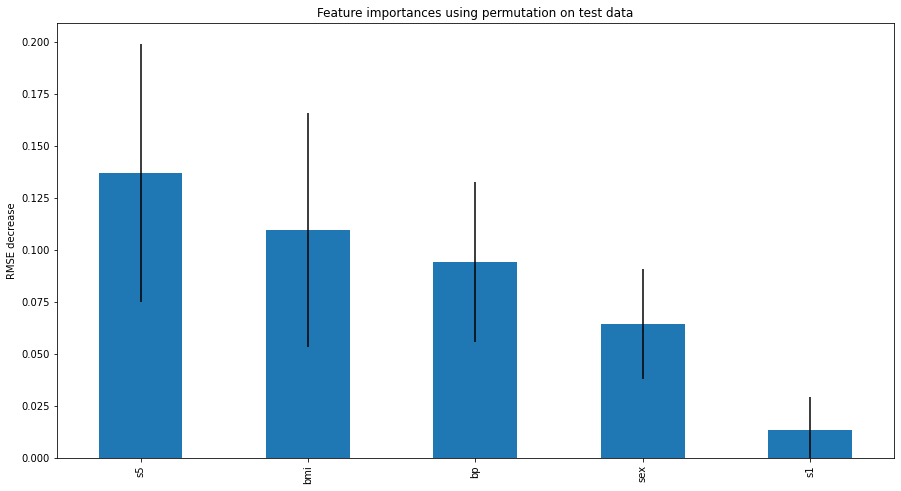

In [16]:
# Perform permutation feature importance using the best ensemble model
permutation_importance_result = permutation_importance(xgboost_regressor, 
                                                       X_***, 
                                                       y_***, 
                                                       n_repeats=10, 
                                                       random_state=seed,)

To evaluate this more easily, we will put it into a dataframe and make a little plot

In [ ]:
# Extract the mean and standard deviation of the feature importances from the results and create Pandas Dataframe
forest_importances = pd.DataFrame({"importances" : permutation_importance_result.importances_mean, 
                                   "stdev" : permutation_importance_result.importances_std }, 
                                   index=diabetes_data['feature_names']).sort_values("importances", ascending=False).iloc[:5]

# Plot the feature importances
fig, ax = plt.subplots(figsize=(15,8))
forest_importances["importances"].plot.bar(yerr=forest_importances.stdev, ax=ax)
ax.set_title("Feature importances using permutation on test data")
ax.set_ylabel("Mean RMSE decrease")
ax.set_ylim(bottom=0)
plt.show()

Based on this plot, we can see which variables are the most important to predicting diabetes.